## Some experimentation to figure out a good way of making a feature ranking plot for random forest classifier

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 

In [2]:
import numpy as np
import statistics

In [3]:
def classify(feature_names, train_features, train_labels, test_features, test_labels):
    """Function to perform classification, using a 
    Random Forest. 

    Reference: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

    Args:
        train_features (numpy array): list of features used to train the classifier
        train_labels (numpy array): list of labels used to train the classifier
        test_features (numpy array): list of features used to test the classifier
        test_labels (numpy array): list of labels (ground truth) of the test dataset

    Returns:
        predictions: list of labels predicted by the classifier for test_features

    Note: You are free to make changes the parameters of the RandomForestClassifier().
    """

    # Initialize a random forest classifier. Change parameters if desired.
    clf = RandomForestClassifier()
    # Train the classifier using the training features and labels.
    clf.fit(train_features, train_labels)
    # Use the classifier to make predictions on the test features.
    predictions = clf.predict(test_features)

    # Compute performance metrics
    confusion_matrix_ = confusion_matrix(test_labels,predictions)
    classification_report_ = classification_report(test_labels,predictions)
    accuracy_score_ = accuracy_score(test_labels, predictions)

    # print(accuracy_score(test_labels, predictions))
    # print(confusion_matrix(test_labels,predictions))
    # print(classification_report(test_labels,predictions))

    metrics = (confusion_matrix_, classification_report_, accuracy_score_)
    
    # NOTE 
    # feature_importance_df = pd.DataFrame([tree.feature_importances_ for tree in clf.estimators_], columns=feature_names)
    feature_importance_df = pd.DataFrame([tree.feature_importances_ for tree in clf.estimators_])
    
    # feature_importances = clf.feature_importances_
    
    # print(f'Feature importances: {feature_importances}, type of feature_importances: {type(feature_importances)}')

    return predictions, metrics, feature_importance_df

In [4]:
def perform_crossval(feature_names, features, labels, folds=10):
    """Function to perform cross-validation.
    Args:
        features (list): list of features
        labels (list): list of labels
        folds (int): number of fold for cross-validation (default=10)
    Returns:
        You can modify this as you like.

    This function splits the data into training and test sets. It feeds
    the sets into the classify() function for each fold. 

    You need to use the data returned by classify() over all folds 
    to evaluate the performance.         
    """

    kf = StratifiedKFold(n_splits=folds)
    labels = np.array(labels)
    features = np.array(features)
    accuracies = []
    feature_importance_frames = []
    metrics_ = []

    for train_index, test_index in kf.split(features, labels):
        X_train, X_test = features[train_index], features[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        predictions, metrics, feature_importance_df = classify(feature_names, X_train, y_train, X_test, y_test)
        accuracy = find_percentage_agreement(predictions.tolist(), y_test.tolist())
        print(accuracy)
        accuracies.append(accuracy)
        metrics_.append(metrics)
        feature_importance_frames.append(feature_importance_df)

    print(f'Mean accuracy: {statistics.mean(accuracies)}')
    
    return accuracies, feature_importance_frames

In [5]:
def find_percentage_agreement(s1, s2):
    assert len(s1)==len(s2), "Lists must have the same shape"
    nb_agreements = 0  # initialize counter to 0
    for idx, value in enumerate(s1):
        if s2[idx] == value:
            nb_agreements += 1

    percentage_agreement = nb_agreements/len(s1)

    return percentage_agreement

In [6]:
def load_data():
    """Function to load data that will be used for classification.

    Args:
        You can provide the args you want.
    Returns:
        features (list): the list of features you extract from every trace
        labels (list): the list of identifiers for each trace

    An example: Assume you have traces (trace1...traceN) for cells with IDs in the
    range 1-N.  

    You extract a list of features from each trace:
    features_trace1 = [f11, f12, ...]
    .
    .
    features_traceN = [fN1, fN2, ...]

    Your inputs to the classifier will be:

    features = [features_trace1, ..., features_traceN]
    labels = [1, ..., N]

    Note: You will have to decide what features/labels you want to use and implement 
    feature extraction on your own.
    """

    df = pd.read_pickle('results/data_2604.pkl')

    labels_only_df = df['cell']

    features_only_df = df.drop('cell', axis = 1)

    features = features_only_df.values.tolist()
    
    feature_names = features_only_df.columns.values.tolist()
    
    labels = labels_only_df.values.tolist()

    return features, labels, feature_names

In [7]:
features, labels, feature_names = load_data()

In [8]:
accuracies, feature_importances_ = perform_crossval(feature_names, features, labels, folds=10)

0.6235294117647059
0.6633291614518148
0.6705882352941176
0.7036295369211515
0.6433041301627034
0.690863579474343
0.7286608260325407
0.6898623279098873
0.7146433041301627
0.6877816725087631
Mean accuracy: 0.681619218565019


In [9]:
import statistics

In [10]:
print(statistics.stdev(accuracies))
print(statistics.mean(accuracies))

0.03046425702638973
0.6799920092905316


In [11]:
print(accuracies)

[0.6277847309136421, 0.6623279098873592, 0.6710888610763455, 0.7048811013767209, 0.6420525657071339, 0.6926157697121402, 0.7261576971214018, 0.6826032540675845, 0.7096370463078848, 0.6807711567351027]


In [12]:
indices = [i for i in range(17)]

In [13]:
indices

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

In [14]:
features_to_ind_dict = dict(list(zip(indices, feature_names)))

In [15]:
features_to_ind_dict

{0: 'overall_number_of_packets',
 1: 'incoming_number_of_packets',
 2: 'outgoing_number_of_packets',
 3: 'overall_data_byte_rate',
 4: 'incoming_data_byte_rate',
 5: 'outgoing_data_byte_rate',
 6: 'overall_data_bit_rate',
 7: 'incoming_data_bit_rate',
 8: 'outgoing_data_bit_rate',
 9: 'overall_avg_packet_rate',
 10: 'incoming_avg_packet_rate',
 11: 'outgoing_avg_packet_rate',
 12: 'overall_avg_packet_size',
 13: 'incoming_avg_packet_size',
 14: 'outgoing_avg_packet_size',
 15: 'outgoing_packets_fraction',
 16: 'incoming_packets_fraction'}

In [10]:
# feature_importances = pd.DataFrame(feature_importances_)

feature_importances = pd.concat(feature_importances_, sort=False)


# Melted data i.e., long format
df_feature_long = pd.melt(feature_importances,var_name='feature name', value_name='values')

In [11]:
feature_importances

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.105637,0.115535,0.081689,0.029544,0.034140,0.031282,0.036202,0.038969,0.027837,0.033567,0.033854,0.032375,0.102511,0.137877,0.074142,0.037942,0.046897
1,0.109604,0.131588,0.058410,0.025145,0.027937,0.033285,0.031715,0.055340,0.030223,0.037692,0.038920,0.031418,0.096457,0.126485,0.082080,0.038742,0.044959
2,0.111887,0.135542,0.066004,0.034504,0.031545,0.033252,0.031802,0.039479,0.032873,0.037921,0.035023,0.032131,0.106352,0.109940,0.073368,0.039686,0.048689
3,0.104590,0.103911,0.061739,0.038474,0.040109,0.028258,0.033083,0.027969,0.028954,0.042363,0.035355,0.030115,0.118490,0.130048,0.083992,0.048193,0.044357
4,0.107869,0.138143,0.080639,0.032180,0.032949,0.031956,0.034731,0.041509,0.029282,0.031311,0.035903,0.027914,0.104418,0.122940,0.076854,0.034688,0.036715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.123754,0.135344,0.065327,0.033597,0.045861,0.034366,0.027002,0.031521,0.029003,0.029470,0.033433,0.032412,0.094503,0.112972,0.088512,0.038751,0.044170
96,0.090529,0.158591,0.086606,0.029303,0.039729,0.039757,0.033520,0.037231,0.029826,0.033497,0.035213,0.033652,0.081102,0.116273,0.078075,0.033481,0.043614
97,0.151278,0.142553,0.082514,0.029971,0.029714,0.033500,0.026998,0.043202,0.032943,0.030881,0.030522,0.033284,0.083419,0.097263,0.078076,0.040409,0.033472
98,0.146620,0.174339,0.097036,0.027947,0.037536,0.034431,0.026618,0.034316,0.030195,0.027315,0.036419,0.030749,0.067019,0.082103,0.072503,0.038583,0.036268


In [12]:
df_feature_long

,feature name,values
0,0,0.105637
1,0,0.109604
2,0,0.111887
3,0,0.104590
4,0,0.107869
...,...,...
16995,16,0.044170
16996,16,0.043614
16997,16,0.033472
16998,16,0.036268


In [14]:
import seaborn as sns

In [15]:
sns.set_style('darkgrid')

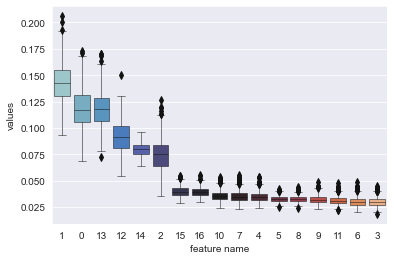

In [16]:
box_pl = sns.boxplot(x="feature name", y="values", order = [1,0,13,12,14,2,15,16,10,7,4,5,8,9,11,6,3], data=df_feature_long, palette="icefire", linewidth=.5)

In [17]:
box_pl.set_xlabel('Feature nr.')
box_pl.set_ylabel('Feature importance')

Text(16.200000000000003, 0.5, 'Feature importance')

In [28]:
fig = box_pl.get_figure()
fig.savefig('feature_importance.png', dpi=300)  